# Data Science Internship @ LetsGrowMore Virtual Internship

## Name:- Neha Dinesh Kolte 

# Task_1 :-Iris Flower Classification Machine Learning Project.

# Iris Flower Classification Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# loading iris dataset

In [2]:
data=pd.read_csv("D:\irisdataset.csv")
data

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.tail()

,sepal.length,sepal.width,petal.length,petal.width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [20]:
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'species'],
      dtype='object')

# Descriptvie statistics

In [21]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data visualization

<AxesSubplot:>

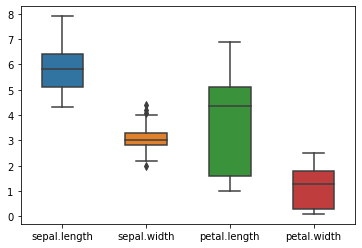

In [23]:
import seaborn as sns
sns.boxplot(data=data,width=0.5)

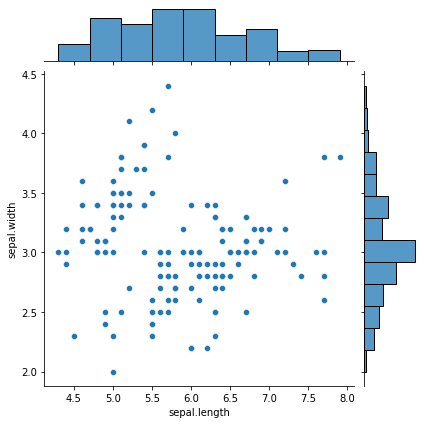

In [24]:
sns.jointplot(x="sepal.length",y="sepal.width",data=data)

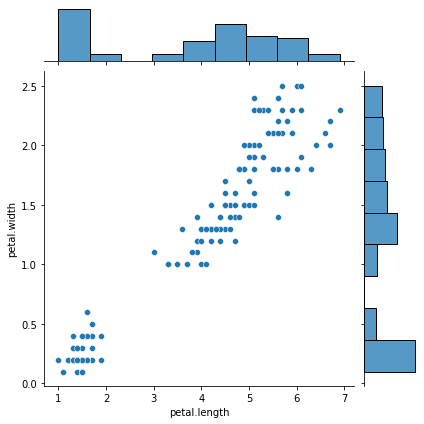

In [25]:
sns.jointplot(x="petal.length",y="petal.width",data=data)

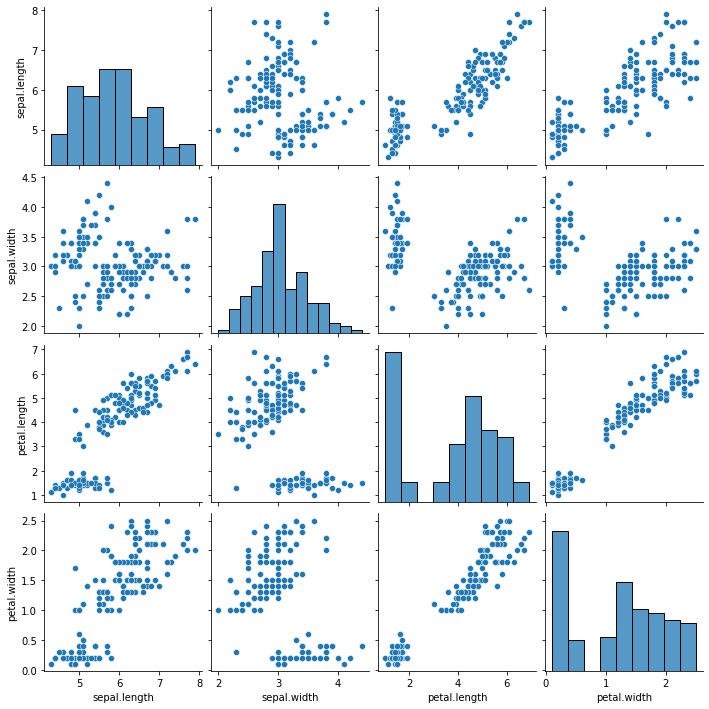

In [26]:
sns.pairplot(data)

# ploting varity

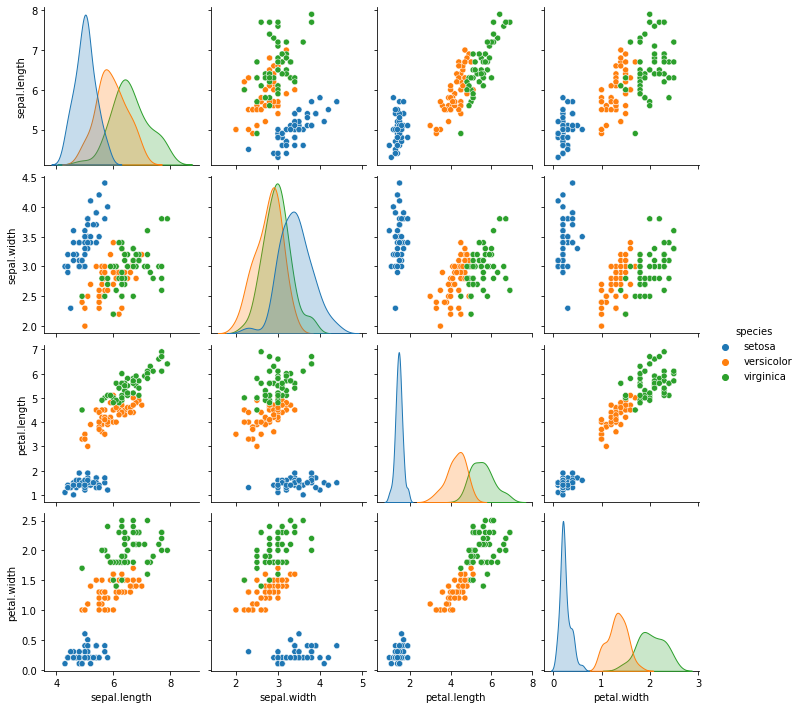

In [28]:
sns.pairplot(data=data,hue="species")
plt.show()

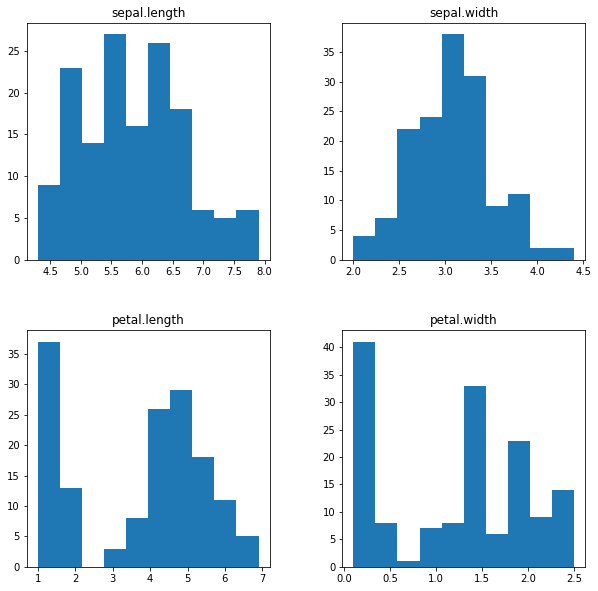

In [29]:
data.hist(figsize=(10,10),grid=0)
plt.show()
          

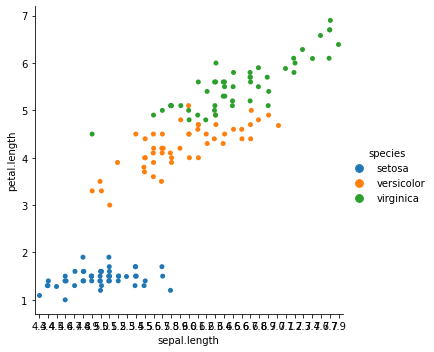

In [31]:
sns.catplot(x="sepal.length",y="petal.length",hue="species",data=data)
plt.show()

# comparison using boxplot

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.barplot(x="species",y="sepal.length",data=data)
plt.subplot(2,2,2)
sns.barplot(x="species",y="petal.length",data=data)
plt.subplot(2,2,3)
sns.barplot(x="species",y="sepal.width",data=data)
plt.subplot(2,2,4)
sns.barplot(x="species",y="petal.width",data=data)


# For correlation

In [14]:
data.corr()


,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.109369,0.871754,0.817954
sepal.width,-0.109369,1.000000,-0.420516,-0.356544
petal.length,0.871754,-0.420516,1.000000,0.962757
petal.width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

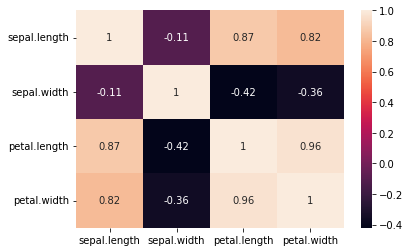

In [15]:
sns.heatmap(data.corr(),annot=True)

# KNN Classification

In [34]:
x=data.iloc[:,0:4]  #features
y=data.iloc[:,-1]   #lables
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

# Data Normalization

In [41]:
x=preprocessing.StandardScaler().fit_transform(x)
x[0:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=1)
y_test.shape

(45,)

# Training and predicting

In [54]:
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(x_train,y_train)
y_predict=knnmodel.predict(x_test)

# Accuracy

In [57]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_predict)
acc

0.9777777777777777